In [147]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [148]:
x = fits.open("fieldA_dbordenave_1.fit")
ra=x[1].data.field('ra')
dec=x[1].data.field('dec')
r=x[1].data.field('r')
x.close()


In [149]:
#masks
b_mask=np.where((r>20.00)&(r<=20.66))
g_mask=np.where((r>20.66)&(r<=21.33))
r_mask=np.where((r>21.33)&(r<=22.00))

#bins
ra_range=np.ceil(ra.max()-ra.min())             #rounded up number of degrees for 
dec_range=np.ceil(dec.max()-dec.min())          # RA and DEC 

ra_bins=ra_range*2.0                                      #Approximate 0.5 X 0.5 degree binning
dec_bins=dec_range*2.0

#binning stars with 'r,g,b' masking
B_stars,xe,xy=np.histogram2d(ra[b_mask],dec[b_mask],bins=(ra_bins,dec_bins))
G_stars,xe,xy=np.histogram2d(ra[g_mask],dec[g_mask],bins=(ra_bins,dec_bins))
R_stars,xe,xy=np.histogram2d(ra[r_mask],dec[r_mask],bins=(ra_bins,dec_bins))

In [150]:
#Setting range of data
#range_b=np.where(B_stars>25)
#range_g=np.where(G_stars>25)
#range_r=np.where(R_stars>25)
#B_stars[range_b]=0.0
#G_stars[range_g]=0.0
#R_stars[range_r]=0.0



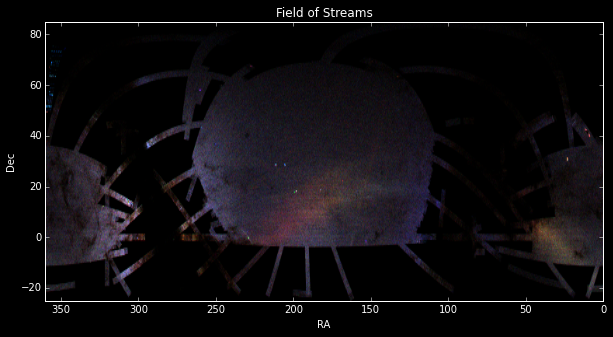

In [159]:
rgb_frame=np.dstack((R_stars.T*4.0/R_stars.max(),G_stars.T*4.0/G_stars.max(),B_stars.T*4.0/B_stars.max()))
ext=[ra.min(),ra.max(),dec.min(),dec.max()]
with plt.style.context(('dark_background')):
    fig,ax=plt.subplots()
    ax.set_xlim(ra.max(),ra.min())
    ax.set_title('Field of Streams')
    ax.set_xlabel('RA')
    ax.set_ylabel('Dec')

    ax.imshow(rgb_frame,extent=ext,aspect='auto', origin='lower')
    fig.set_size_inches(10,5)
    fig.savefig('field_of_streams.png',dpi=250)

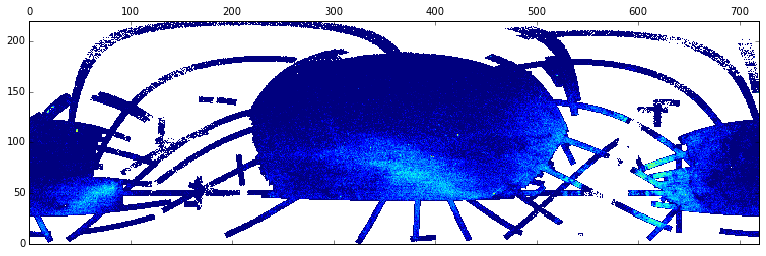

In [152]:
from matplotlib.colors import LogNorm
plt.matshow(R_stars.T,origin='lower',norm=LogNorm(vmin=20.0, vmax=R_stars.max()))

In [153]:
np.unique(rgb_frame)

array([  0.        ,   0.01538462,   0.01818182,   0.03076923,
         0.03636364,   0.04615385,   0.05454545,   0.06153846,
         0.07272727,   0.07692308,   0.09090909,   0.09230769,
         0.10769231,   0.10909091,   0.12307692,   0.12727273,
         0.13846154,   0.14545455,   0.15384615,   0.16363636,
         0.16923077,   0.18181818,   0.18461538,   0.2       ,
         0.21538462,   0.21818182,   0.23076923,   0.23636364,
         0.24615385,   0.25454545,   0.26153846,   0.27272727,
         0.27692308,   0.29090909,   0.29230769,   0.30769231,
         0.30909091,   0.32307692,   0.32727273,   0.33846154,
         0.34545455,   0.35384615,   0.36363636,   0.36923077,
         0.38181818,   0.38461538,   0.4       ,   0.41538462,
         0.41818182,   0.43076923,   0.43636364,   0.44615385,
         0.45454545,   0.46153846,   0.47272727,   0.47692308,
         0.49090909,   0.49230769,   0.50769231,   0.50909091,
         0.52307692,   0.52727273,   0.53846154,   0.54

In [154]:
print np.sort(R_stars.flatten())[-5:]
print np.sort(G_stars.flatten())[-5:]
print np.sort(B_stars.flatten())[-5:]

[ 158.  158.  168.  178.  615.]
[ 166.  188.  228.  323.  761.]
[ 201.  232.  234.  310.  521.]
